In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gaussian_nb.csv')
df

,age,y
0,56,0
1,57,0
2,37,0
3,40,0
4,56,0
...,...,...
41183,73,1
41184,46,0
41185,56,0
41186,44,1


# Como é o modelo Naïve Bayes?

<center>
    <h1> $Pr(y | idade) = \frac{Pr(idade | y)\cdot Pr(y)}{Pr(idade)}$ </h1>
</center>

# Sendo que:
 - y = 1 ou 0, logo $Pr(y)$ é fácil de ser calculada
 - $Pr(idade)$ não precisa ser calculada, pois podemos normalizar usando a condição, $Pr(y=0|idade) + Pr(y=1|idade) = 1$

<hr />

### Estimar a $Pr(idade|y)$ é dificil! É muito ruidoso!
### Lembrando que normalmente temos muitas variáveis

<hr />

# Hipótese extra no Gaussian Naïve Bayes
 - A distribuição de $Pr(idade|y)$ é uma **distribuição normal**

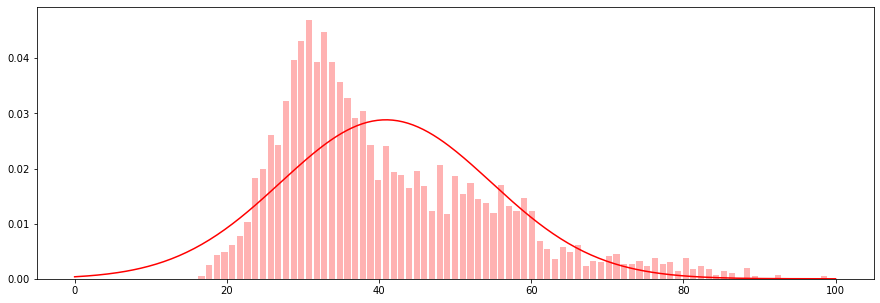

In [3]:
media_1 = df.loc[df.y==1].age.mean()
std_1 = df.loc[df.y==1].age.std()

plt.figure(figsize=(15,5))
plt.hist(df.loc[df.y==1].age, rwidth=.8, bins=np.linspace(0,100,100), color='r', alpha=.3, density=True)

from scipy.stats import norm

x = np.linspace(0,100,300)
plt.plot(x, norm.pdf(x,media_1, std_1),'r-')

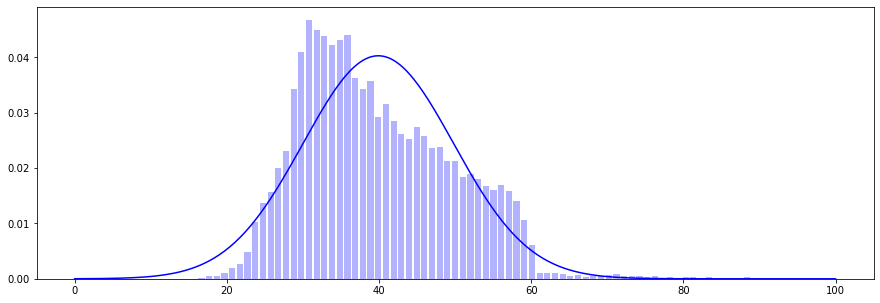

In [4]:
media_0 = df.loc[df.y==0].age.mean()
std_0 = df.loc[df.y==0].age.std()

plt.figure(figsize=(15,5))
plt.hist(df.loc[df.y==0].age, rwidth=.8, bins=np.linspace(0,100,100), color='b', alpha=.3, density=True)

from scipy.stats import norm

x = np.linspace(0,100,300)
plt.plot(x, norm.pdf(x,media_0, std_0),'b-')

# Por exemplo: Pr(idade=30|y=0) vale:

In [5]:
norm.pdf(30,media_0,std_0)

0.024413861387616222

# E a $Pr(idade=30|y=1)$

In [6]:
norm.pdf(30,media_1, std_1)

0.021124619530361655

In [7]:
norm.pdf(70,media_0,std_0)

0.0003969810320236849

In [8]:
norm.pdf(70,media_1,std_1)

0.0031650267052752493

# Fazendo à mão!

<center>
    <h1> $Pr(y | idade) = \frac{Pr(idade | y)\cdot Pr(y)}{Pr(idade)}$ </h1>
</center>

$Pr(y=1|idade=30) + Pr(y=0|idade=30) = 1$

$Pr(idade=30|y=1)*Pr(y=1) / Pr(idade) + Pr(idade=30|y=0)*Pr(y=0) / Pr(idade) = 1$

$Pr(idade=30|y=1)*Pr(y=1) + Pr(idade=30|y=0)*Pr(y=0) = Pr(idade)$

In [11]:
idade = 30

pr_y_1 = (df.y==1).sum() / df.shape[0]
pr_y_0 = (df.y==0).sum() / df.shape[0]

pr_y_1_idade_30_nonnormed = norm.pdf(30,media_1,std_1)*pr_y_1
pr_y_0_idade_30_nonnormed = norm.pdf(30,media_0,std_0)*pr_y_0

cte = (pr_y_1_idade_30_nonnormed+pr_y_0_idade_30_nonnormed)

pr_y_1_idade_30 = pr_y_1_idade_30_nonnormed/cte
pr_y_0_idade_30 = pr_y_0_idade_30_nonnormed/cte

In [12]:
pr_y_0_idade_30,pr_y_1_idade_30

(0.9010212798993329, 0.09897872010066715)

# E agora com modelo:

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(df[['age']],df.y)

GaussianNB()

In [14]:
para_predizer = pd.DataFrame([30],columns=['age'])
para_predizer

,age
0,30


In [16]:
gnb.predict_proba(para_predizer)

array([[0.90101764, 0.09898236]])

In [17]:
pr_y_0_idade_30,pr_y_1_idade_30

(0.9010212798993329, 0.09897872010066715)